# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [37]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


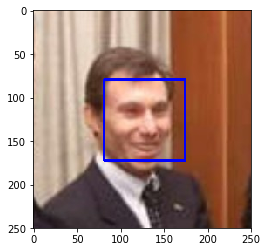

In [38]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [39]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [40]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def haar_cascade_face_detector_performance(files):
    """Estimates the haar caascade face detector performance
    """
    human_faces = 0 
    for f in tqdm(files):
        if face_detector(f):
            human_faces += 1
    return human_faces/len(files)



In [41]:
human_faces_percentage_human_files = haar_cascade_face_detector_performance(human_files_short) * 100
human_faces_percentage_dog_files = haar_cascade_face_detector_performance(dog_files_short) * 100

print(f"Percentage of human faces in human_files_short dataset is {human_faces_percentage_human_files}%, expected 100%")
print(f"Percentage of human faces in dog_files_short dataset is {human_faces_percentage_dog_files}%, expected 0%")


100%|██████████| 100/100 [00:06<00:00, 14.95it/s]

Percentage of human faces in human_files_short dataset is 99.0%, expected 100%
Percentage of human faces in dog_files_short dataset is 18.0%, expected 0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [42]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# I will try the build in opencv face detector to compare its performance with respect to the haar cascades approach
# Loading the deep pretrained neural network, it was added in the path face_detection_dl_model
import os

def face_detector_deep_nn(img_path):
    image = cv2.imread(img_path)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))
    face_model_path = os.path.sep.join(["face_detection_dl_model", "res10_300x300_ssd_iter_140000.caffemodel"])
    face_model_proto_path = os.path.sep.join(["face_detection_dl_model", "deploy.prototxt.txt"])
    net = cv2.dnn.readNetFromCaffe(face_model_proto_path, face_model_path)
    net.setInput(blob)
    detections = net.forward()
    for i in range(0, detections.shape[2]):

        confidence = detections[0, 0, i, 2]
        if confidence > 0.95:
            # a human was detected
            return 1
    return 0

def face_detector_deep_nn_performance(files):
    """Estimates the pretrained dl face detector performance
    """
    human_faces = 0 
    for f in tqdm(files):
        if face_detector_deep_nn(f):
            human_faces += 1
    return human_faces/len(files)
    

In [43]:
human_faces_percentage_human_files = face_detector_deep_nn_performance(human_files_short) * 100
human_faces_percentage_dog_files = face_detector_deep_nn_performance(dog_files_short) * 100

print(f"Percentage of human faces in human_files_short dataset is {human_faces_percentage_human_files}%, expected 100%")
print(f"Percentage of human faces in dog_files_short dataset is {human_faces_percentage_dog_files}%, expected 0%")

100%|██████████| 100/100 [00:06<00:00, 13.13it/s]

Percentage of human faces in human_files_short dataset is 100.0%, expected 100%
Percentage of human faces in dog_files_short dataset is 13.0%, expected 0%


## Performance Comparison

We can clearly see that the dl  classifier has less false positives in comparison to the haar cascades classifier Haar found a ratio of 18.0% human faces in the dog dataset, whereas the pretrained nn found a 13% ratio.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [46]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [47]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_and_transform_image(img_path):
    """
    Loads and transforms an image into a tensor that is suitable for the VGG16 network
    """

    documentation_mean, documentation_std = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
    VGG_16_input_size = (224,224)
    
    transform = transforms.Compose([
        transforms.Resize(VGG_16_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])
    
    image = Image.open(img_path).convert('RGB')
    # adds batch dimension
    image = transform(image).unsqueeze(0)
    
    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = load_and_transform_image(img_path).to(device)
    VGG16.to(device)
    output_class = VGG16(image_tensor)
    probs_tensor, preds_tensor = torch.max(output_class, 1)
    
    return preds_tensor.item() # predicted class index

img_path = dog_files[2]

print("Predicted index", VGG16_predict(img_path))

print("The pretrained VGG16 network predicted the index 166 for the third image which corresponds to the Walker hound label")

Predicted index 162
The pretrained VGG16 network predicted the index 166 for the third image which corresponds to the Walker hound label


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [48]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model):
    ## TODO: Complete the function.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image_tensor = load_and_transform_image(img_path).to(device)
    model.to(device)
    output_class = model(image_tensor)
    probs_tensor, preds_tensor = torch.max(output_class, 1)
    class_index = preds_tensor.item()
    dog_found = True if class_index >=151 and class_index <=268 else False
    return dog_found # true/false


In [49]:
dog_detector(img_path, VGG16)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [50]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detector_performance(dog_files, model):
    
    dogs_found = 0
    for f in tqdm(dog_files):
        if dog_detector(f, model):
            dogs_found += 1
    return dogs_found/len(dog_files)



In [52]:
dog_faces_percentage_human_files = dog_detector_performance(human_files_short, VGG16) * 100
dog_faces_percentage_dog_files = dog_detector_performance(dog_files_short, VGG16) * 100

print(f"Model used : VGG16. Percentage of dog faces in human_files_short dataset is {dog_faces_percentage_human_files}%, expected 0%")
print(f"Model used : VGG16. Percentage of dog faces in dog_files_short dataset is {dog_faces_percentage_dog_files}%, expected 100%")



100%|██████████| 100/100 [00:20<00:00,  4.27it/s]

Model used : VGG16. Percentage of dog faces in human_files_short dataset is 1.0%, expected 0%
Model used : VGG16. Percentage of dog faces in dog_files_short dataset is 97.0%, expected 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [53]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define VGG16 model
RESNET50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    RESNET50 = RESNET50.cuda()
    

In [55]:
dog_faces_percentage_human_files = dog_detector_performance(human_files_short, RESNET50) * 100
dog_faces_percentage_dog_files = dog_detector_performance(dog_files_short, RESNET50) * 100

print(f"Model used : RESNET50. Percentage of dog faces in human_files_short dataset is {dog_faces_percentage_human_files}%, expected 0%")
print(f"Model used : RESNET50. Percentage of dog faces in dog_files_short dataset is {dog_faces_percentage_dog_files}%, expected 100%")

100%|██████████| 100/100 [00:17<00:00,  4.69it/s]

Model used : RESNET50. Percentage of dog faces in human_files_short dataset is 0.0%, expected 0%
Model used : RESNET50. Percentage of dog faces in dog_files_short dataset is 0.0%, expected 100%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

documentation_mean, documentation_std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
custom_cnn_input_size = (64, 64)

train_transform = transforms.Compose([
        # We apply data augmantation techniques such as randomly flip and rotate on the training set
        transforms.RandomHorizontalFlip(), 
        transforms.RandomRotation(10),
        transforms.Resize(custom_cnn_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])

test_transform = transforms.Compose([
        # Data augmentation is disabled on the testing set
        transforms.Resize(custom_cnn_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(val_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# define dataloader parameters
batch_size = 64
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_scratch = {'train': train_loader, 'valid' : valid_loader, 'test' : test_loader}
print(len(os.listdir(train_dir)))

print(train_data.class_to_idx)
print(len(train_data.classes))

133
{'001.Affenpinscher': 0, '002.Afghan_hound': 1, '003.Airedale_terrier': 2, '004.Akita': 3, '005.Alaskan_malamute': 4, '006.American_eskimo_dog': 5, '007.American_foxhound': 6, '008.American_staffordshire_terrier': 7, '009.American_water_spaniel': 8, '010.Anatolian_shepherd_dog': 9, '011.Australian_cattle_dog': 10, '012.Australian_shepherd': 11, '013.Australian_terrier': 12, '014.Basenji': 13, '015.Basset_hound': 14, '016.Beagle': 15, '017.Bearded_collie': 16, '018.Beauceron': 17, '019.Bedlington_terrier': 18, '020.Belgian_malinois': 19, '021.Belgian_sheepdog': 20, '022.Belgian_tervuren': 21, '023.Bernese_mountain_dog': 22, '024.Bichon_frise': 23, '025.Black_and_tan_coonhound': 24, '026.Black_russian_terrier': 25, '027.Bloodhound': 26, '028.Bluetick_coonhound': 27, '029.Border_collie': 28, '030.Border_terrier': 29, '031.Borzoi': 30, '032.Boston_terrier': 31, '033.Bouvier_des_flandres': 32, '034.Boxer': 33, '035.Boykin_spaniel': 34, '036.Briard': 35, '037.Brittany': 36, '038.Brussels

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

1. How does your code resize the images (by cropping, stretching, etc)? 

    My code rezises the input images by applying the transforms.Resize method.
    

2. What size did you pick for the input tensor, and why?

    I selected 128 as input size. My architecture will resamble a smaller version of the VGG16 achitecture, which employs small 3 by 3 filters, and stacks several conv layers before applying the destructive max pooling layer. My network is contains less layers (to save training time), hence, I proposed to use as input roughly half the size used by VGG, which is  128. By choosing a smaller size, I can reduce the size of the activation maps with less layers.
    

3. Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?

    I decided to augment my dataset to reduce overfitting and probably enhance the model performance on the testing set. To achive that, I applied transforms that randomly flip and rotate the images, but only on the training and validation sets. 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv2 = nn.Conv2d(3, 32, 3, padding=1)
        # convolutional layer (sees 32x32x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 16x16x64 tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 8x8x128 tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        # generates q 4x4x256
            
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (4 * 4 * 256 -> 1000)
        self.fc1 = nn.Linear(4 * 4 * 256, 1000)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(1000, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
                # add sequence of convolutional and max pooling layers

        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv4(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv5(x)))
        #print(x.shape)
        
        # flatten image input
        x = x.view(-1, 4 * 4 * 256)
        #print(x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        #print(x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        #print(x.shape)

        return x
       

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN


# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
image = images[0].unsqueeze(0)
label = labels[0]
print(image.shape, label, labels.shape)
model_scratch = Net()
output = model_scratch(image)
print(output.shape)

torch.Size([1, 3, 64, 64]) tensor(129) torch.Size([64])
torch.Size([1, 133])


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
In first place I analyzed some CNN architectures that were designed to classify RGB images that contain animals  (i.e. VGG16). This analysis gave me some inspiration about how to design a network from scratch. My network takes into account the VGG16 pattern by stacking several CONV->MAXPOOL layers, using small 3x3 filters and applying droput between the FC layers. Though, I used a smaller input to reduce the spatial size of the activation maps with less layers (to save training time). The class implementation was straightforward, firstly, by defining the layers to be used and geeping track of the layer's output and secondly, by defining the forward pass.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9)

#learning_rate = 1e-4
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
from tqdm import tqdm
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        print("Epoch", epoch)
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()

        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            print("Currently on epoch {}, training batch_idx {}".format(epoch, batch_idx))
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
           

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        batch_iteration = 0
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            print("Currently on epoch {}, validation batch_idx {}".format(epoch, batch_idx))
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Epoch {}. Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                epoch,    
                valid_loss_min,
                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model





In [ ]:
# I stopped the training phase before the 60 epochs because the model was overfitting, hence the output is not shown.
# train the model
model_scratch = train(60, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

##### load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
1


In [14]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [7]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        print("Testing validation batch_idx {}".format(batch_idx))
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [ ]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [1]:
import os
from torchvision import datasets
from PIL import Image
import torch
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

documentation_mean, documentation_std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
custom_cnn_input_size = (224, 224)

train_transform = transforms.Compose([
        # We apply data augmantation techniques such as randomly flip and rotate on the training set
        transforms.RandomHorizontalFlip(), 
        transforms.RandomRotation(10),
        transforms.Resize(custom_cnn_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])

test_transform = transforms.Compose([
        # Data augmentation is disabled on the testing set
        transforms.Resize(custom_cnn_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(val_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# define dataloader parameters
batch_size = 64
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

loaders_transfer = {'train': train_loader, 'valid' : valid_loader, 'test' : test_loader}
print(len(os.listdir(train_dir)))






133


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [2]:
import torch.nn as nn
import torchvision.models as models
# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)

# print out the model structure
print(model_transfer)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [3]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

n_inputs = model_transfer.classifier[6].in_features
n_dog_classes = len(os.listdir(train_dir))
# add last linear layer (n_inputs -> 133 dog breeds)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, n_dog_classes)

model_transfer.classifier[6] = last_layer

# check to see that your last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)
print(model_transfer)
# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

133
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Co

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

My CNN architecture uses the pretrained VGG16 Network as feature extractore. To achieve this, I freezed all the CNN layers up to the fully connected layers, which, will be optimized to adjust the new task of classifying 133 dog breeds instead of 1000 imagenet classes. I changed the output of the last FC layer from 1000 to 133 (number of dog classes). 

I think that this architecture is suitable for my work because it was trained on several real life images including dogs! which resemble the new photos that I want to classify (both datasets are similar). On top of that, I can save time by only training the last FC layers instead of the whole massive network  which has already learned useful filters!

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [4]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
n_epochs = 4
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch 1
Currently on epoch 1, training batch_idx 0
Currently on epoch 1, training batch_idx 1
Currently on epoch 1, training batch_idx 2
Currently on epoch 1, training batch_idx 3
Currently on epoch 1, training batch_idx 4
Currently on epoch 1, training batch_idx 5
Currently on epoch 1, training batch_idx 6
Currently on epoch 1, training batch_idx 7
Currently on epoch 1, training batch_idx 8
Currently on epoch 1, training batch_idx 9
Currently on epoch 1, training batch_idx 10
Currently on epoch 1, training batch_idx 11
Currently on epoch 1, training batch_idx 12
Currently on epoch 1, training batch_idx 13
Currently on epoch 1, training batch_idx 14
Currently on epoch 1, training batch_idx 15
Currently on epoch 1, training batch_idx 16
Currently on epoch 1, training batch_idx 17
Currently on epoch 1, training batch_idx 18
Currently on epoch 1, training batch_idx 19
Currently on epoch 1, training batch_idx 20
Currently on epoch 1, training batch_idx 21
Currently on epoch 1, training bat

Currently on epoch 2, training batch_idx 64
Currently on epoch 2, training batch_idx 65
Currently on epoch 2, training batch_idx 66
Currently on epoch 2, training batch_idx 67
Currently on epoch 2, training batch_idx 68
Currently on epoch 2, training batch_idx 69
Currently on epoch 2, training batch_idx 70
Currently on epoch 2, training batch_idx 71
Currently on epoch 2, training batch_idx 72
Currently on epoch 2, training batch_idx 73
Currently on epoch 2, training batch_idx 74
Currently on epoch 2, training batch_idx 75
Currently on epoch 2, training batch_idx 76
Currently on epoch 2, training batch_idx 77
Currently on epoch 2, training batch_idx 78
Currently on epoch 2, training batch_idx 79
Currently on epoch 2, training batch_idx 80
Currently on epoch 2, training batch_idx 81
Currently on epoch 2, training batch_idx 82
Currently on epoch 2, training batch_idx 83
Currently on epoch 2, training batch_idx 84
Currently on epoch 2, training batch_idx 85
Currently on epoch 2, training b

In [22]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [10]:
import numpy as np
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Testing validation batch_idx 0
Testing validation batch_idx 1
Testing validation batch_idx 2
Testing validation batch_idx 3
Testing validation batch_idx 4
Testing validation batch_idx 5
Testing validation batch_idx 6
Testing validation batch_idx 7
Testing validation batch_idx 8
Testing validation batch_idx 9
Testing validation batch_idx 10
Testing validation batch_idx 11
Testing validation batch_idx 12
Testing validation batch_idx 13
Test Loss: 1.680161


Test Accuracy: 69% (585/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [20]:
data_transfer = {}
data_transfer['train'] = train_data
data_transfer['valid'] = valid_data
data_transfer['test'] = test_data

In [21]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_and_transform_image(img_path):
    """
    Loads and transforms an image into a tensor that is suitable for the VGG16 network
    """

    documentation_mean, documentation_std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)
    VGG_16_input_size = (224,224)
    
    transform = transforms.Compose([
        transforms.Resize(VGG_16_input_size),
        transforms.ToTensor(),
        transforms.Normalize(documentation_mean, documentation_std)
        ])
    
    image = Image.open(img_path).convert('RGB')
    # adds batch dimension
    image = transform(image).unsqueeze(0)
    
    return image

In [36]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img_tensor = load_and_transform_image(img_path)
    predictions = model_transfer(img_tensor)
    best_pred = predictions.data.max(1, keepdim=True)
    probability = best_pred.values
    label_index = best_pred.indices
    return class_names[int(label_index.data.cpu().numpy()[0])]

img_path = dog_files[0]

predict_breed_transfer(img_path)


'Dalmatian'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [66]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if dog_detector(img_path, VGG16):
        # load color (BGR) image
        print("---------------------------")
        img = cv2.imread(img_path)    
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # display the image, along with bounding box
        plt.imshow(cv_rgb)
        plt.show()  
        dog_breed = predict_breed_transfer(img_path)
        print("A dog was detected")
        print("This dog looks like a {}".format(dog_breed))
        print("---------------------------")
        print("")
    elif face_detector(img_path):
        print("---------------------------")
        img = cv2.imread(img_path)    
        # convert BGR image to RGB for plotting
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # display the image, along with bounding box
        plt.imshow(cv_rgb)
        plt.show()  
        dog_breed = predict_breed_transfer(img_path)
        print("A human was detected")
        print("You slightly resemble a {}".format(dog_breed))
        print("---------------------------")
        print("")
    else:
        print("Error :( According to our algorithm the input image does not contain a dog or a human!")
    
    
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I was quite impressed by the algorithm performance, even when the dog breed label is not correct the selected one is similar.

I got a test accuracy of 69% after fine tuning on just 4 epochs and 14 % on the CNN created by scratch. I propose the following improvements in my models.

1. Accuracy might increase by using a larger dataset.
2. Applying learning rate decay and training for more epochs could increase the model performance.
3. The network trained from scratched heavily overfitted the training set, applying more regularization techniques such as L2 could solve that problem.
4. Trying more advance optimizer such as Adam might produce better results.

---------------------------


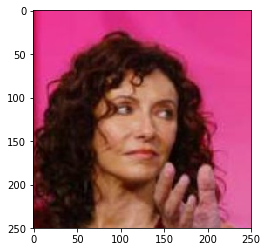

A human was detected
You slightly resemble a Afghan hound
---------------------------

---------------------------


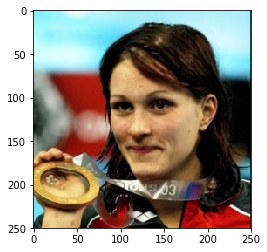

A human was detected
You slightly resemble a Dandie dinmont terrier
---------------------------

---------------------------


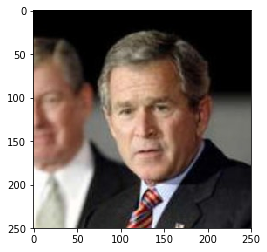

A human was detected
You slightly resemble a Brittany
---------------------------

---------------------------


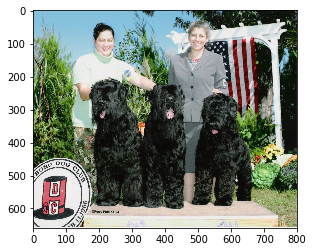

A dog was detected
This dog looks like a Curly-coated retriever
---------------------------

---------------------------


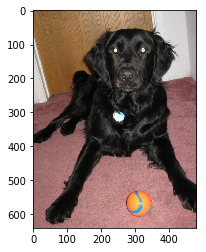

A dog was detected
This dog looks like a Flat-coated retriever
---------------------------

---------------------------


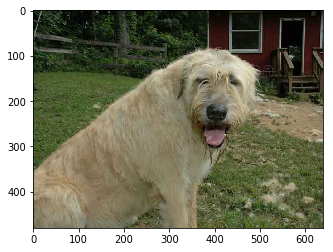

A dog was detected
This dog looks like a Irish wolfhound
---------------------------



In [69]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
random_human_indexes = np.random.choice(len(human_files), 3)
random_dog_indexes = np.random.choice(len(dog_files), 3)
for file in np.hstack((human_files[random_human_indexes], dog_files[random_dog_indexes])):
    run_app(file)